In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import precision_score, recall_score
from sklearn.preprocessing import scale
from keras.optimizers import SGD
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score
from sklearn.model_selection import cross_val_score

/Users/andreapalladino/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# importing data using Pandas

dftrain=pd.read_csv('train.csv',header=None)
dftrain.head()

dftrain.shape

(42000, 785)

In [3]:
dftest=pd.read_csv('test.csv',header=None)
dftest.head()

dftest.shape

(28000, 784)

In [4]:
# converto i dati in Array per comodità
nn=dftrain.shape[1]

ycheck=np.array(dftrain.iloc[:,0])
y=np.array(pd.get_dummies(dftrain.iloc[:,0]))
#y=ycheck
X=np.array(dftrain.iloc[:,1:nn])

In [5]:
# reshape del vettore, in modo da poter visualizzare l'immagine

#peppe=np.random.rand(28,28)

#def numimg(t):
 #   for i in range(28):
  #      for j in range(28):
   #         peppe[i,j]=X[t,j+28*i]
   # return peppe

def numimg2(t,X):
    vecreshape=np.reshape(X[t,:],[28,28])
    return vecreshape

4


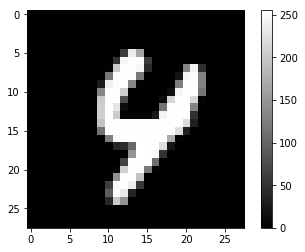

In [6]:
print(ycheck[39001])

plt.imshow(numimg2(39001,X),cmap='gray')
plt.colorbar()
plt.show()

In [7]:
# inizio il codice di machine learning con reti neurali

ncols=X.shape[1]
numutput=10 #ho 10 possibili output

print(ncols)

784


In [8]:
model=Sequential()
model.add(Dense(28*28,activation='sigmoid',input_shape=(ncols,)))
model.add(Dense(28,activation='sigmoid'))
model.add(Dense(numutput,activation='softmax'))
#model.add(Dense(1))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
#model.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=1)

history=model.fit(X,y,validation_split=0.,epochs=10,callbacks=[early_stopping_monitor])
print("Loss function: " + model.loss)

Epoch 1/10
42000/42000 [==============================] - 18s 429us/step - loss: 0.5525 - acc: 0.8802
Epoch 2/10
  480/42000 [..............................] - ETA: 17s - loss: 0.3178 - acc: 0.9187

/Users/andreapalladino/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:569: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,acc
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


42000/42000 [==============================] - 16s 379us/step - loss: 0.2931 - acc: 0.9171
Epoch 3/10
42000/42000 [==============================] - 16s 383us/step - loss: 0.2569 - acc: 0.9246
Epoch 4/10
42000/42000 [==============================] - 15s 369us/step - loss: 0.2376 - acc: 0.9272
Epoch 5/10
42000/42000 [==============================] - 16s 372us/step - loss: 0.2235 - acc: 0.9310
Epoch 6/10
42000/42000 [==============================] - 19s 443us/step - loss: 0.2159 - acc: 0.9343
Epoch 7/10
42000/42000 [==============================] - 21s 489us/step - loss: 0.2016 - acc: 0.9363
Epoch 8/10
42000/42000 [==============================] - 24s 575us/step - loss: 0.1950 - acc: 0.9405
Epoch 9/10
42000/42000 [==============================] - 23s 541us/step - loss: 0.1963 - acc: 0.9377
Epoch 10/10
42000/42000 [==============================] - 19s 459us/step - loss: 0.1856 - acc: 0.9419
Loss function: categorical_crossentropy


In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_2 (Dense)              (None, 28)                21980     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                290       
Total params: 637,710
Trainable params: 637,710
Non-trainable params: 0
_________________________________________________________________


In [34]:
#predizioni del modello
risultati=np.round(model.predict(X),1)

#print(risultati con dataset di training)
finres=np.argmax(risultati,axis=1)

print(finres[0:30])

#confronto con i dati reali
print(ycheck[0:30])

np.sum(finres==ycheck)/len(finres)*100    #accuratezza

[1 0 1 4 0 0 7 3 5 3 8 9 1 3 3 1 2 0 7 5 8 6 2 0 2 3 6 9 9 7]
[1 0 1 4 0 0 7 3 5 3 8 9 1 3 3 1 2 0 7 5 8 6 2 0 2 3 6 9 9 7]


94.23809523809524

In [11]:
# I compute the final results using the test dataset

Xtest=np.array(dftest)

#predizioni del modello
risultati=np.round(model.predict(Xtest),1)

#print(risultati con dataset di test)
finres=np.argmax(risultati,axis=1)

print(finres[0:10])

[2 0 9 9 3 7 0 3 0 3]


The predicted number is  7


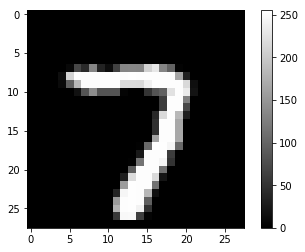

The predicted number is  6


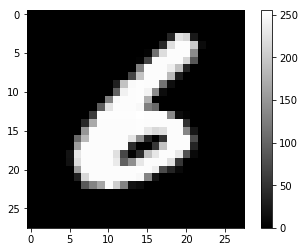

The predicted number is  1


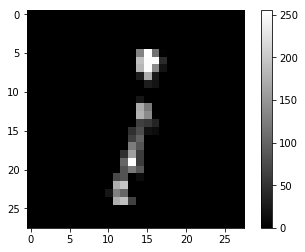

The predicted number is  9


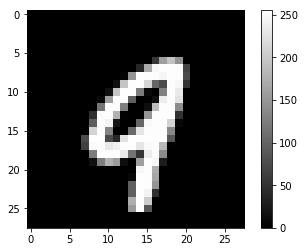

The predicted number is  7


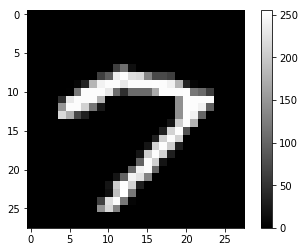

The predicted number is  9


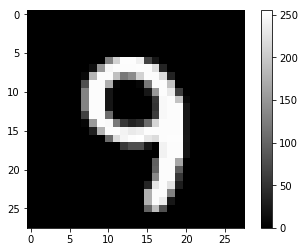

The predicted number is  7


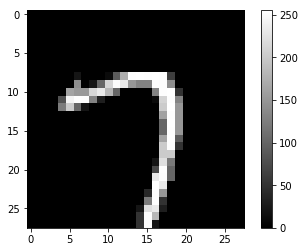

The predicted number is  3


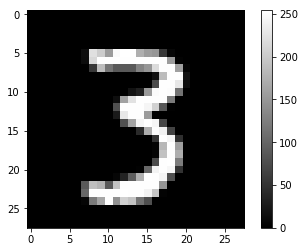

The predicted number is  9


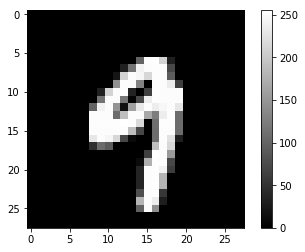

The predicted number is  2


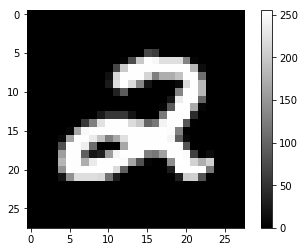

In [29]:
import time

for i in range(27990,28000):
    print("The predicted number is ",finres[i])
    plt.imshow(numimg2(i,Xtest),cmap='gray')
    plt.colorbar()
    plt.show() 
    plt.pause(1)


In [28]:
imageid=np.arange(1,len(finres)+1)

dictionary={'ImageID':imageid,'Label':finres}

df=pd.DataFrame(dictionary)

df.to_csv('sample_submission.csv',index=False)

df.head()

,ImageID,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
